In [1]:
import numpy as np
import pandas as pd
import networkx as nx
#import json
#import os
import page_ranker as pr
#import import_graph as ig
import inspect_subgraph as isg

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N=16

In [4]:
star = nx.star_graph(N)
G = nx.MultiDiGraph()
for e in star.edges:
    G.add_edge(e[1],e[0])

nx.set_node_attributes(G,'vanilla', 'type')
nx.set_edge_attributes(G,'vanilla', 'type')

In [5]:
G.nodes[0]

{'type': 'vanilla'}

In [8]:
G.edges[(1,0,0)]

{'type': 'vanilla'}

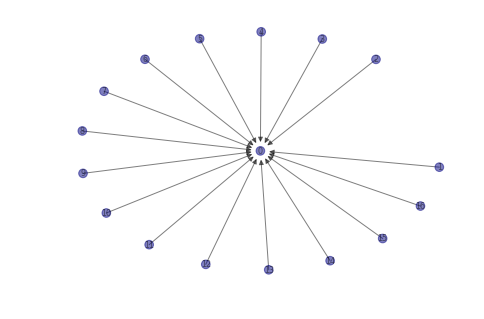

In [7]:
isg.inspectSubGraph(G, G.nodes, expand=False, verbose=False, label=True,pos = "kk")

In [ ]:
alpha = 0
iterations = 50

seed = {n:1/len(G.nodes) for n in G.nodes}
#seed = {n:0 for n in G.nodes}
#seed[0] =1

node_wt_by_type = {'vanilla': 1}
edge_wt_by_type = {'vanilla': (1,1/2)}

self_loop_wt= .1

In [ ]:
r, df, g = pr.pageRanker(G,
                         alpha,
                         iterations,
                         seed=seed,
                         initial_value = seed,
                         lazy=False,
                         self_loop_wt=self_loop_wt, 
                         node_wt_by_type =node_wt_by_type,
                         edge_wt_by_type=edge_wt_by_type)

In [ ]:
df.tail(1).T.plot(kind='bar',legend=False, title='PageRank Distribution')

In [ ]:
df.plot( figsize=(20,10))

In [ ]:
df.sum(axis=1).plot()

In [ ]:
ns = [10000*G.nodes[n]['score'] for n in G.nodes]
nl = {n:n for n in G.nodes}

nx.draw_kamada_kawai(G, node_size=ns, labels=nl, font_size=8, alpha=.5)

In [ ]:
nx.get_node_attributes(G,'self_wt')

In [ ]:
nx.get_edge_attributes(G,'out_weight')

In [ ]:
nx.get_edge_attributes(G,'in_weight')

In [ ]:
nx.get_node_attributes(G,'total_wt')